In [43]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import tensorflow as tf

In [44]:
tf.keras.utils.image_dataset_from_directory?? 

SyntaxError: invalid syntax (502732113.py, line 1)

In [45]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2152 files belonging to 3 classes.


In [46]:
data.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [47]:
data_iterator = data.as_numpy_iterator()

In [48]:
batch = data_iterator.next()

In [49]:
batch[0].shape

(32, 256, 256, 3)

In [50]:
batch[1]

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 1])

In [51]:
classes=['early blight potato','late blight potato','healthy potato']

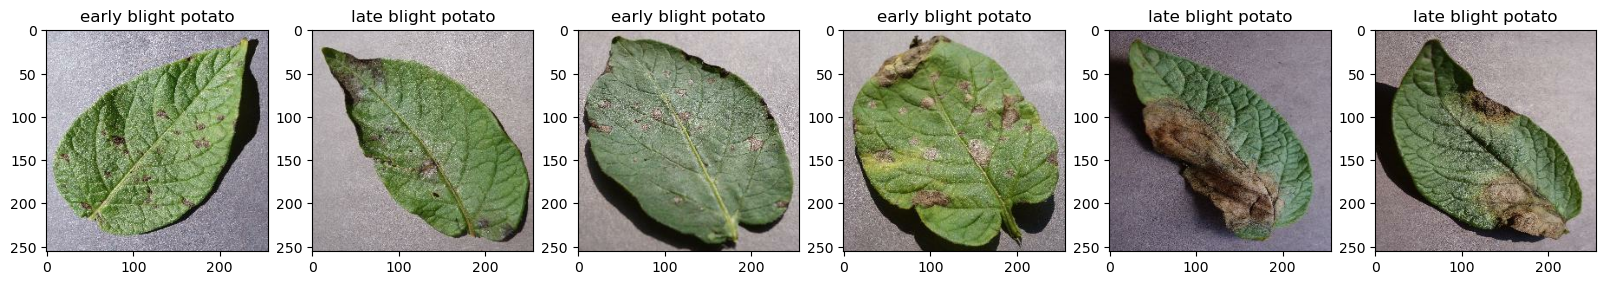

In [52]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(classes[batch[1][idx]])

In [53]:
data = data.map(lambda x,y: (x/255, y))

In [54]:
s=data.as_numpy_iterator().next()


In [55]:
s[0].max(),s[0].min()

(1.0, 0.0)

In [56]:
len(data)

68

In [57]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [58]:
test_size+val_size+train_size

68

In [59]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [60]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
len(train)*32

1504

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax') ) # 3 classes: healthy, early blight, late blight

In [63]:
from tensorflow.keras.optimizers import Adam
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
) 

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [65]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
47/47 [==============================] - 20s 366ms/step - loss: 0.7559 - accuracy: 0.6456 - val_loss: 0.3884 - val_accuracy: 0.8438
Epoch 2/20
47/47 [==============================] - 17s 357ms/step - loss: 0.2462 - accuracy: 0.9036 - val_loss: 0.2070 - val_accuracy: 0.9241
Epoch 3/20
47/47 [==============================] - 18s 367ms/step - loss: 0.1936 - accuracy: 0.9249 - val_loss: 0.1255 - val_accuracy: 0.9598
Epoch 4/20
47/47 [==============================] - 18s 368ms/step - loss: 0.0983 - accuracy: 0.9634 - val_loss: 0.0861 - val_accuracy: 0.9754
Epoch 5/20
47/47 [==============================] - 17s 360ms/step - loss: 0.0459 - accuracy: 0.9867 - val_loss: 0.0590 - val_accuracy: 0.9799
Epoch 6/20
47/47 [==============================] - 17s 360ms/step - loss: 0.0556 - accuracy: 0.9814 - val_loss: 0.3063 - val_accuracy: 0.9152
Epoch 7/20
47/47 [==============================] - 17s 362ms/step - loss: 0.1464 - accuracy: 0.9402 - val_loss: 0.1049 - val_accuracy: 0.9598

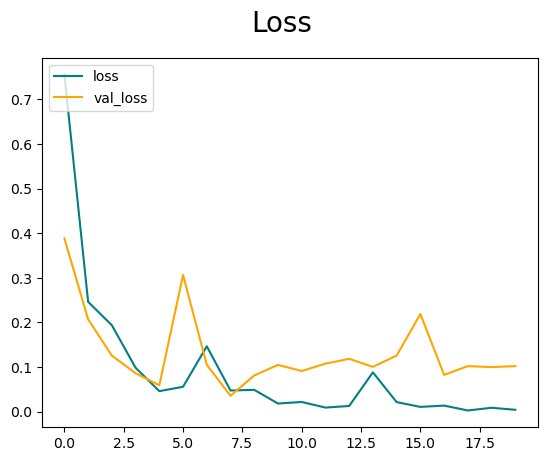

In [67]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

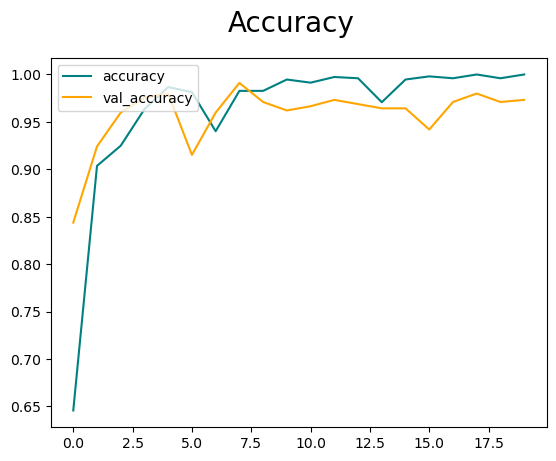

In [68]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
model.evaluate(test)

7/7 [==============================] - 2s 78ms/step - loss: 0.0974 - accuracy: 0.9550


[0.0973573699593544, 0.9549999833106995]

In [30]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from keras.utils import to_categorical

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    n = [np.argmax(element) for element in yhat]
    pre.update_state(y, n)
    re.update_state(y, n)
    acc.update_state(y, n)

# Print the final results after processing all batches
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Categorical Accuracy:", acc.result().numpy())



1/1 [==============================] - 0s 178ms/step
Precision: 0.9504132
Recall: 0.9745763
Categorical Accuracy: 0.85714287


1/1 [==============================] - 0s 73ms/step


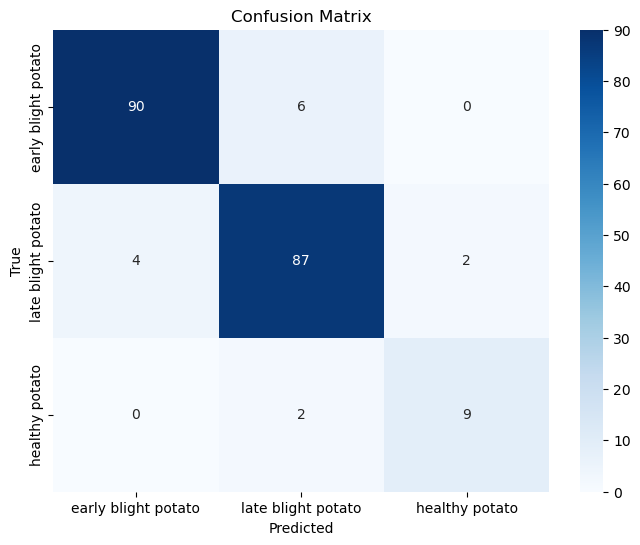

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have the true labels (y_true) and predicted labels (y_pred) for your test set
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    n = [np.argmax(element) for element in yhat]
    y_true.extend(y)
    y_pred.extend(n)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Create confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_true, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        96
           1       0.92      0.94      0.93        93
           2       0.82      0.82      0.82        11

    accuracy                           0.93       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.93      0.93      0.93       200



In [32]:

#classes=['early blight potato','late blight potato','healthy potato']

1/1 [==============================] - 0s 195ms/step
[1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0] [1 1 0 1 1 0 2 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0]


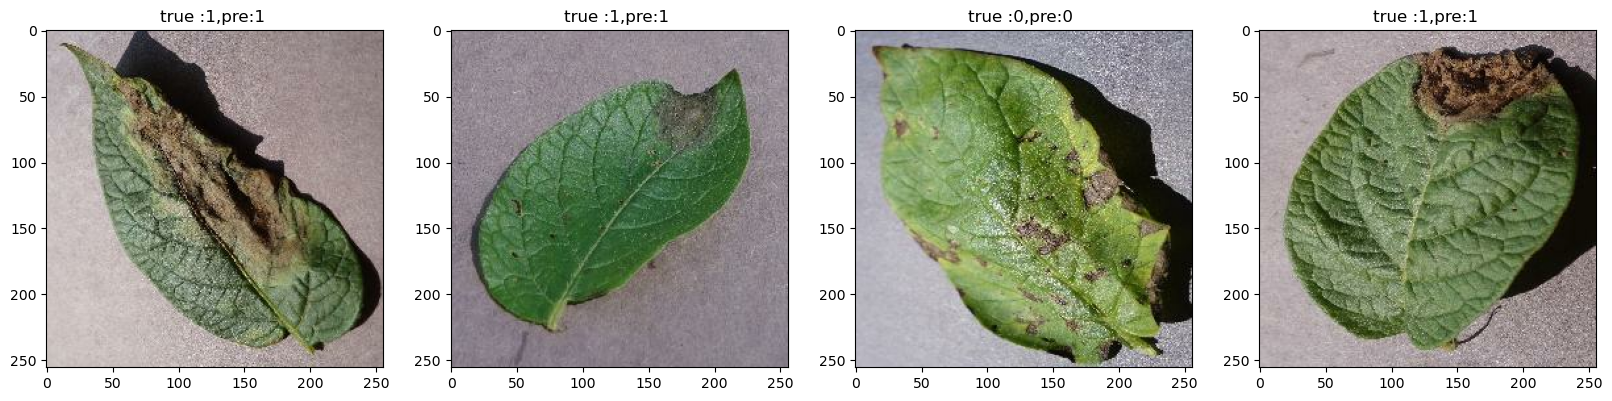

In [33]:
bat=train.as_numpy_iterator()
batch = bat.next()
X, y = batch
yhat = model.predict(X)
n = [np.argmax(element) for element in yhat]
print(n,y)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(X[:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(f'true :{y[idx]},pre:{n[idx]} ')

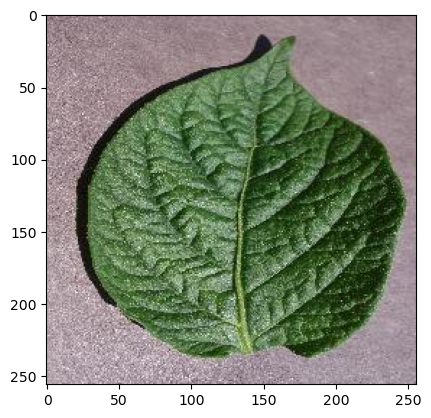

In [35]:
img = cv.imread('pt.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
plt.show()

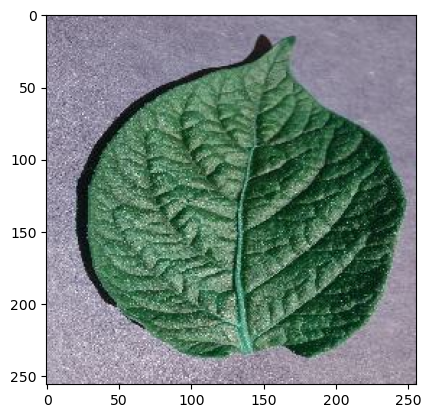

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhatt = model.predict(np.expand_dims(resize/255, 0))
print(yhatt)
yhatt.max() 

1/1 [==============================] - 0s 61ms/step
[[1.0433562e-12 9.8457109e-05 9.9990153e-01]]


0.99990153

In [39]:
np.argmax(yhatt)

2

In [40]:
classes[np.argmax(yhatt)]

'healthy potato'

In [39]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','potatodisease2.h5'))

C:\Users\Pro\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
new_model = load_model('models\potatodisease.h5')
pre=new_model.predict(np.expand_dims(resize/255, 0))
classes[np.argmax(pre)]

1/1 [==============================] - 0s 185ms/step


'healthy potato'

In [42]:

model.save("models\potatodiseasee.h5")

model = tf.keras.models.load_model("models\potatodiseasee.h5")

# Convert the TensorFlow model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Step 3: Save the TensorFlow Lite model to a file
with open("my_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Pro\AppData\Local\Temp\tmpbua7_pjq\assets


INFO:tensorflow:Assets written to: C:\Users\Pro\AppData\Local\Temp\tmpbua7_pjq\assets
